# INF8460 – Traitement automatique de la langue naturelle - Automne 2025

# TP1: Plongements lexicaux avec Skip-Gram with Negative Sampling (SGNS) (100 points)

## Identification de l'équipe

### Groupe de laboratoire:

### Equipe numéro:

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

**Nature de la contribution:** Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis ! N'indiquez pas seulement : travail réparti équitablement.

## Usage des LLMs

Notez que l'usage des LLMs est strictement prohibé.

Vous devez masquer les fonctionnalités d'IA générative dans les paramètres de Colab (Paramètres -> Assistance IA).

Même si cela demande plus d'effort et de temps, la résolution des TPs par vos propres moyens vous permettra d'acquérir toutes les compétences en TALN pour vos travaux futurs. Nous incluerons des questions de code des TPs dans l'examen final et considérerons toute utilisation de LLM comme un cas de plagiat.


## Introduction (5 points)

Dans ce TP, vous allez implémenter et entraîner **votre propre modèle Word2Vec**, en particulier la variante **Skip-Gram avec échantillonnage négatif** (SGNS). Ce modèle apprend à représenter chaque mot sous forme d’un vecteur dense (aussi appelé embedding ou plongement), de telle sorte que les **mots apparaissant dans des contextes similaires aient des vecteurs proches** dans l’espace vectoriel.

L’objectif est double :

**Comprendre et coder l’algorithme SGNS** depuis zéro, afin de maîtriser les principes qui sous-tendent l’apprentissage des représentations de mots.

**Explorer la géométrie des vecteurs appris**, à travers une série d’expériences qui mettent en lumière des propriétés émergentes souvent ignorées.

Le TP est divisé en 6 sections avec un total de 100 points :

0. **Introduction (5 points)**

Présentation du TP et questions préliminaires.

1. **Préparation des données et analyses préliminaires (20 points)**

Vous commencerez par charger un sous-ensemble de Wikipédia et analyser ses statistiques : taille du vocabulaire, loi de Zipf, etc. Vous manipulerez également un jeu de données de similarité (SimLex-999) pour évaluer vos plongements plus tard.

2. **Implémentation du modèle SGNS (25 points)**

Vous construirez le cœur du modèle :

* Une classe pour générer les paires mot-contexte (jeu de données)
* Une architecture PyTorch du modèle SGNS
* Une boucle d’entraînement avec sauvegarde automatique des poids

3. **Comparaison avec GloVE (20 points)**

Une fois le modèle entraîné, vous évaluerez la qualité des plongements produits et les comparerez avec des embeddings GloVE :

* En mesurant la similarité sémantique (cosinus, analogies),
* En représentant des concepts dans un plan 2D via PCA pour détecter des structures géométriques intéressantes.

4. **Études des relations géométriques entre les embeddings (15 points)**

Vous évaluerez les propriétes géométriques des relations sémantiques et syntaxiques à l'aide d'un jeu de données d'analogies.

5. **Étude approfondie de la géométrie des embeddings SGNS (15 points)**

Dans cette dernière partie, vous réaliserez plusieurs expériences empiriques pour analyser finement **l'organisation spatiale des vecteurs SGNS**, notamment leur alignement global en fonction de la fréquence des mots.


---
### Fichiers du TP

* **data** : contient tous les jeux de données et les embeddings utilisés pour le TP1.
    * **analogies** : jeu de données d'analogies sémantiques et syntaxiques pour l'évaluation.
    * **glove_data** : embeddings GloVe téléchargés en ligne.
    * **SimLex-999** : jeu de données de similarité de mots pour l'évaluation.
    * **wikipedia_corpus** : extrait de Wikipédia utilisé pour l'entraînement.

---
### Présentation du modèle SGNS (Skip-Gram with Negative Sampling)

Le modèle **SGNS** appartient à la famille **Word2Vec**, conçu pour apprendre des représentations vectorielles de mots à partir de grands corpus textuels. L’idée centrale est d’entraîner un modèle qui, à partir d’un mot donné, **prédit ses mots contextuels voisins** (skip-gram, à l'inverse de CBOW).

### Architecture simplifiée

- **Entrée :** un mot cible (sous forme one-hot, ou encodée en entier)
- **Sortie :** probabilité qu'un mot soit dans le contexte du mot cible
- **Réseau :** une couche d’embedding en entrée et en sortie (deux matrices à apprendre)

### Éléments clés

1. **Fenêtre de contexte :**
   Pour chaque mot, on considère les mots adjacents dans une fenêtre de taille fixe (ex: ±2 mots).

2. **Échantillonnage négatif (negative sampling) :**
   Au lieu de prédire une probabilité pour tous les mots du vocabulaire, on ne prend que quelques mots de contexte “faux” (négatifs), en plus du "vrai" mot de contexte. Les négatifs sont tirés selon une distribution de bruit particulière.

3. **Objectif :**
   Maximiser la probabilité des mots contextuels corrects et **minimiser celle des mots négatifs**.
   Le tout est formulé comme une tâche de classification binaire :

   $$
   \log \sigma(\mathbf{v}_{w_i} \cdot \mathbf{v}_{w_j}) + \sum_{k=1}^{K} \mathbb{E}_{w_k \sim P_n(w)} [\log \sigma(-\mathbf{v}_{w_i} \cdot \mathbf{v}_{w_k})]
   $$

   - $w_i$ : mot central
   - $w_j$ : mot contexte
   - $w_k$ : mot négatif
   - $\mathbf{v}_{w_x}$ : embedding d'un mot
   - $\sigma$ : fonction sigmoïde
   - $K$ : nombre d’échantillons négatifs
   - $P_n(w)$ : distribution de bruit (souvent la fréquence des mots à la puissance 0.75)

---
### Questions préliminaires (5 points)


**Q-0.1 (2 points) Sans negative sampling, comment se passerait la prédiction d’un mot de contexte dans un vocabulaire de taille $V$ ?**

**Q-0.2 (1 point) Que fait le negative sampling à la place ?**


**Q-0.3 (1 point) En vous basant sur la fonction objective, quel est le but du modèle SGNS ?**


**Q-0.4 (1 point) Comment cela se traduit géométriquement ?**

---
## Préparation de l'environnement (0 point)

Connexion à Google Drive

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import torch, torchvision
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))

torch: 2.7.1+cu118
torchvision: 0.22.1+cu118
CUDA available: True
Device: NVIDIA GeForce RTX 4060 Laptop GPU


In [5]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"  
torch.backends.cudnn.enabled = False      


Définition du dossier de travail

In [6]:
# #@markdown Enter the path to the assignment folder in your Google Drive

# import warnings
# import os
# import sys

# folder = "/content/drive/MyDrive/NLP/TP1" #@param {type:"string"}

# # Add the assignment folder to Python path
# if folder not in sys.path:
#   sys.path.insert(0, folder)

# #changer le repertoire courant
# os.chdir(folder)

Importation des bibliothèques

In [7]:
import collections
import glob
import numpy as np
import pandas as pd
import pickle
import random
import time
import torch
import torch.nn as nn

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from dataclasses import dataclass
from scipy.stats import gaussian_kde, spearmanr
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, IterableDataset
from tqdm import tqdm

Définition du `device`

In [8]:
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device : {device}")

device : cuda


---
## 1. Préparation des données et premières analyses (20 points)


- Définition de la classe d'arguments du modèle SGNS pour la suite du TP
- Importation du dataset `wikipedia` pour l'entraînement
  - Nombre total de mots dans le corpus  
  - Taille du vocabulaire  
  - Vérification empirique de la loi de Zipf
- Chargement du dataset `Sim-Lex-999` pour l'évaluation des embbedings

### 1.1 Définition de la classe d'arguments du modèle SGNS pour la suite du TP (0 point)

`args = SGNSArgs()` contient toutes les variables que nous allons utiliser pour entraîner notre modèle.

Vous pouvez y penser comme une alternative aux variables globales.

In [9]:
@dataclass
class SGNSArgs:
    max_vocab_size: int = 30_000 # taille maximale du vocabulaire, afin de limiter la durée d'entraînement
    embedding_dim: int = 50      # dimension de l'embedding
    window_size: int = 5         # taille de la fenêtre contextuelle
    neg_samples: int = 5         # nombre de mots négatifs pour chaque centre
    batch_size: int = 8192       # taille de la batch
    lr: float = 0.003            # taux d'apprentissage (learning rate)
    epochs: int = 15             # nombre d'époques d'entraînement
    nb_first: int = -1           # nombre de mots du corpus utilisés pour l'entraînement (-1 pour utiliser tout le corpus)


    def model_name(self):
        return f"sgns_voc{self.max_vocab_size}_emb{self.embedding_dim}_win{self.window_size}_neg{self.neg_samples}_bs{self.batch_size}_lr{self.lr}_e{self.epochs}_n{self.nb_first}"

args = SGNSArgs()

### 1.2 Importation et pré-traitement du corpus d'entraînement (4 points)

Pour l'entraînement, nous allons utiliser un corpus d'articles de Wikipédia en langue anglaise couramment utilisé pour entraîner les modèles d'embeddings.

In [10]:
with open(f"data/wikipedia_corpus.txt", "r", encoding="utf-8") as f:
    dataset = f.read()

print(f"First 1000 characters:\n{dataset[:1000]}")

First 1000 characters:
 anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate the elimination of authoritarian institutions particularly the state the word anarchy as most anarchists use it does not imply chaos nihilism or anomie but rather a harmonious anti authoritarian society in place of what are regarded as authoritarian political structures and coer

**Q-1.2.1 (3 points) En regardant les données du corpus, donnez 3 étapes de pré-traitement qui semblent déjà avoir été appliquées.**

- 1) minuscule
- 2) Suppression de la ponctuation et des caractères spéciaux
- 3) nettoyage des balises et métadonnées comme les liens 

**Q-1.2.2 (1 point) Effectuez les  étapes de prétraitement restantes: Segmentez le dataset en jetons et enlevez les mots vides (stop words). Dans notre cas 1 jeton = 1 mot.**

In [11]:
stop_words = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with',
        'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
        'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must',
        'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
        'my', 'your', 'his', 'her', 'its', 'our', 'their', 'this', 'that', 'these', 'those'
    }

### TODO ###
#split le dataset en jetons par espace 
jetons = dataset.split()
#enlever les stop_words de la liste de jetons
jetons_clear = [tok for tok in jetons if tok not in stop_words]
print(len(jetons))
print(len(jetons_clear))

### END TODO ###

17005207
12011324


### 1.3 Analyses statistiques préliminaires (9 points)


Avant d’entraîner un modèle, il est essentiel de bien comprendre le contenu du corpus.

Dans cette cellule, vous allez réaliser une brève analyse statistique du texte brut.

**Q-1.3.1 (3 points) Affichez :**
- **le nombre total de jetons,**
- **le nombre de types (nombre de jetons distincts),**
- **les 20 jetons les plus fréquents, avec leur nombre d'occurences.**

In [12]:
### TODO ###
vocab = len(jetons_clear)
print(f"le nombre total de jetons est de : {vocab}")
unique_jetons = len(list(set(jetons_clear)))
print(f"le nombre de types est de : {unique_jetons} " )
df = pd.DataFrame(jetons_clear,columns=["jetons"])
df.groupby("jetons")['jetons'].count().sort_values(ascending=False).head(20)

### END TODO ###

le nombre total de jetons est de : 12011324
le nombre de types est de : 253798 


jetons
one      411764
zero     264975
nine     250430
two      192644
as       131815
eight    125285
s        116710
five     115789
three    114775
four     108182
six      102145
seven     99683
from      72871
which     54788
also      44358
not       44033
other     32433
first     28810
some      28161
all       26229
Name: jetons, dtype: int64

La [**loi de Zipf**](https://en.wikipedia.org/wiki/Zipf%27s_law) est une loi valide pour tous les corpus de texte en language naturel.
Elle prédit que le mot le plus courant apparaît environ deux fois plus souvent que le deuxième plus courant, trois fois plus souvent que le troisième plus courant, et ainsi de suite.
Plus formellement, la fréquence $f$ d’un mot est inversement proportionnelle à son rang $r$:

$$
f(r) \propto \frac{1}{r^\alpha}, \text{ avec souvent } \alpha \approx 1
$$

**Q-1.3.2 (2 points) Vérifiez que le corpus suit la loi de Zipf. Pour cela, tracez la fréquence des mots en fonction de leur rang, en échelle logarithmique pour les deux axes (`log-log`).**

In [13]:
### TODO ###
#cree la df pour les frequences
df_freq = df.groupby("jetons").agg(frequence=('jetons', 'count')).sort_values(by='frequence', ascending=False).reset_index()
# ajouter la column du rang
df_freq['rang'] = df_freq.index + 1
df_freq.head()
### END TODO ###

,jetons,frequence,rang
0,one,411764,1
1,zero,264975,2
2,nine,250430,3
3,two,192644,4
4,as,131815,5


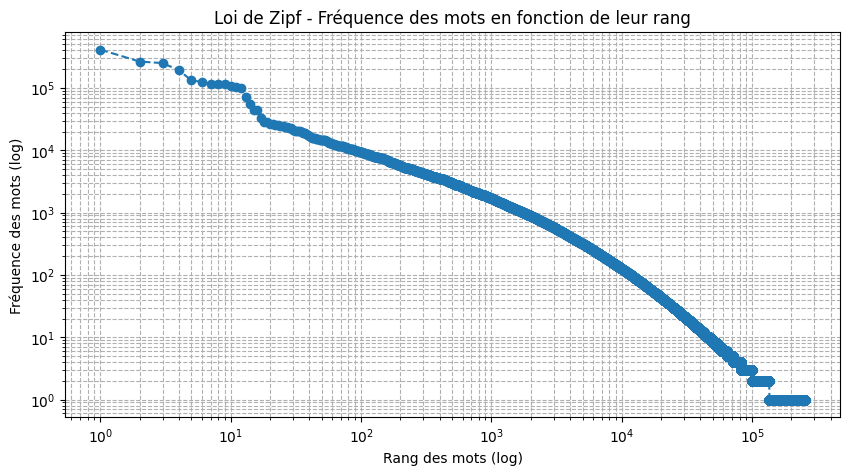

In [14]:
#plot la courbe grace a matplotlib
plt.figure(figsize=(10, 5))
#utlilisant le log de la freq et du rang
plt.loglog(df_freq['rang'], df_freq['frequence'], marker='o', linestyle='--')

plt.title("Loi de Zipf - Fréquence des mots en fonction de leur rang")
plt.xlabel("Rang des mots (log)")
plt.ylabel("Fréquence des mots (log)")
plt.grid(True, which="both", ls="--")

plt.show()

**Q-1.3.3 (1 point) Qu'indique l'obtention d'une courbe linéaire ?**

- cela indique que le corpus suit aproximativement la loi de zipf

**Q-1.3.4 (1 point) À quoi correspond la valeur de la pente de la courbe dans l'expression mathématique de la loi de Zipf ?**

- La pente de la courbe dans l'expression mathématique de la loi de Zipf correspond à l'exposant de la loi de puissance, qui indique le taux de décroissance de la fréquence des mots en fonction de leur rang

**Q-1.3.5 (1 point) Que signifie la valeur de la pente en pratique ?**

In [15]:
# Calculer les logarithmes des rangs et des fréquences
log_rang = np.log(df_freq['rang'])
log_frequence = np.log(df_freq['frequence'])

# Effectuer la régression linéaire sur les données log-transformées
# deg=1 pour une régression linéaire
coefficients = np.polyfit(log_rang, log_frequence, deg=1)

# Le premier coefficient est la pente
pente = coefficients[0]

print(f"La pente de la droite est : {pente:.4f}")

La pente de la droite est : -1.5327


- Une pente de-1.5327 signifie que la fréquence des mots du corpus décroît plus rapidement que celle d'un corpus standard qui suit la loi de Zipf avec une pente de -1.

**Q-1.3.6 (1 point) Que signifierait une pente plus / moins raide pour la distribution des mots dans le corpus ?**

- cela signifie que le corpus une pente plus raide montre une inégalité plus marquée dans la distribution des mots peu de mots très fréquents, beaucoup de mots rares , tandis qu'une pente moins raide indique une distribution plus équilibrée , moins de domination des mots fréquents.


- ici la pente de -1,52  indique une distribution des mots plus inégale qu'une pente standard de -1. Les mots très fréquents dominent fortement le corpus, avec une concentration marquée de leurs occurrences. Les mots moins fréquents de rang inférieur apparaissent encore plus rarement, suggérant une diversité lexicale réduite.

### 1.4 Définition du vocabulaire et préparation du corpus pour l'entraînement (3 points)

**Q-1.4.1 (2 points) Associez chaque mot du vocabulaire à un identifiant entier unique, puis encodez le corpus sous forme de liste d’identifiants (IDs).**

Vous devez :
- définir le vocabulaire trié par fréquence décroissante. Il ne faut garder que les `args.max_vocab_size` mots les plus fréquents ;
- construire un dictionnaire `word_to_id` qui associe chaque mot à un ID ;
- construire le dictionnaire miroir `id_to_word` ;
- réserver un ID spécial (`UNK_ID`) pour représenter tous les mots inconnus, c’est-à-dire ceux qui ne figurent pas dans les `max_vocab_size` mots les plus fréquents ;
- encoder le corpus original en une liste d’IDs (`encoded_corpus`) en remplaçant chaque mot par son ID, ou par `UNK_ID` s’il est hors-vocabulaire.

L’argument `args.nb_first` permet de tronquer la liste `encoded_corpus` aux `nb_first` premiers mots, pour ne travailler que sur un sous ensemble du corpus.

```python
word_to_id["one"]      # 0
encoded_corpus[:10]    # [5177, 3024, 4, 150, 3077, 17, 27, 115, 87, 687]
```

Cela permet de convertir efficacement le texte en une séquence d'entiers, exploitable pour l'entraînement du modèle.

In [16]:
df_freq.head()

,jetons,frequence,rang
0,one,411764,1
1,zero,264975,2
2,nine,250430,3
3,two,192644,4
4,as,131815,5


In [17]:
from collections import Counter
# ID spécial pour les mots hors-vocabulaire
UNK_TOKEN = "<UNK>"

# 1) Fréquences
freq = Counter(jetons_clear)

# 2) Vocabulaire trié par fréquence décroissante (on garde les top-k)
vocab_sorted = [w for w, c in freq.most_common(args.max_vocab_size)]

# 3) Dictionnaires : les mots fréquents ont des IDs 0..K-1 ; UNK prend l'ID K
word_to_id = {w: i for i, w in enumerate(vocab_sorted)}

UNK_ID = len(vocab_sorted) 
word_to_id[UNK_TOKEN] = UNK_ID

id_to_word = {i: w for w, i in word_to_id.items()}

# 4) Encodage du corpus (OOV -> UNK_ID)
encoded_corpus = [word_to_id.get(w, UNK_ID) for w in jetons_clear]

# 5) Tronquage éventuel aux nb_first premiers IDs
if getattr(args, "nb_first", None) is not None:
    encoded_corpus = encoded_corpus[:args.nb_first]

if args.nb_first > 0:
  encoded_corpus = encoded_corpus[:args.nb_first]
  print(f"Corpus limited to the first {args.nb_first} words.")
else:
  print(f"Using entire corpus.")

print(f"Encoded corpus size: {len(encoded_corpus)}")
print(word_to_id["one"])
print(encoded_corpus[:10])


Using entire corpus.
Encoded corpus size: 12011323
0
[5177, 3024, 4, 150, 3077, 17, 27, 115, 87, 687]


**Q-1.4.2 (1 point) Trouvez et affichez le premier mot du corpus sous l'ID du jeton `UNK_ID`.**

In [18]:
### TODO ###
first_unk_word = None

for i, tid in enumerate(encoded_corpus):
    if tid == UNK_ID:
        first_unk_word = jetons_clear[i]
        break

# Affichage 
print(first_unk_word if first_unk_word is not None else "aucun mot sous UNK_ID")

### END TODO ###

culottes


### 1.5 Distribution des mots négatifs (4 points)

Pour entraîner le modèle SGNS, nous aurons besoin de tirer des mots dits "négatifs", c’est-à-dire des mots sans lien avec le contexte du mot central.

**Q-1.5.1 (2 points) Construisez une distribution de probabilité sur le vocabulaire selon la règle suivante :**
- **chaque mot est pondéré selon sa fréquence élevée à la puissance $0.75$, comme suggéré dans l'article Word2Vec.**
- **une petite probabilité (par exemple $10^{-6}$) est ajoutée pour le mot spécial `<UNK>` afin qu’il puisse également être tiré.**

Cette distribution sera utilisée pour générer efficacement des exemples négatifs de qualité lors de l'entraînement du modèle.

In [19]:
### TODO ###
epsilon = 1e-6

# Count frequencies for each word ID in vocabulary
word_counts = torch.zeros(vocab)
for word_id in encoded_corpus:
    if word_id < vocab:  
        word_counts[word_id] += 1

# Apply power 0.75
weights = word_counts ** 0.75

# Add small epsilon for UNK token 
weights[UNK_ID] = max(weights[UNK_ID], epsilon)

# Normalize to get probability distribution
unigram_dist = weights / weights.sum()
unigram_dist = unigram_dist.to(device)

**Q-1.5.2 (2 points) Pourquoi élève-t-on les fréquences à la puissance $0,75$ ?**

- On utilise l’exposant 0,75 pour lisser la distribution des mots et obtenir un meilleur équilibre entre mots fréquents et rares lors de l’échantillonnage négatif, ce qui améliore l’entraînement des vecteurs de mots.

---
## 2. Implémentation et entraînement de SGNS (25 points)

### 2.1 `SGNSDataset` : génération des paires mot-contexte (4 points)

Nous allons construire un dataset SGNSDataset qui génère les paires (mot central, mot contexte) de manière itérative, en parcourant le corpus d'entraînement.

Pour chaque position `i`, on prend comme contexte tous les mots situés dans une fenêtre de taille fixe `window_size` autour du mot central `encoded_text[i]`, à gauche et à droite (en excluant le mot lui-même).

Lorsque `batch_size` paires sont collectées, on les retourne sous forme de deux tenseurs `LongTensor` (`centers`, `contexts`).

**Q-2.1 (4 points) Complétez la méthode `__iter__` pour accumuler les paires (`center`, `context`) avec une fenêtre symétrique de taille `window_size`.**

In [20]:
class SGNSDataset(IterableDataset):
    def __init__(self, encoded_text, window_size, batch_size):
        self.encoded_text = encoded_text
        self.window_size = window_size
        self.batch_size = batch_size

    def __iter__(self):
        centers = []
        contexts = []

        ### TODO ###
        # Longueur du texte encodé
        n = len(self.encoded_text)
        W = self.window_size
        
        for i in range(n):
            # Le mot central à la position i
            center = self.encoded_text[i]
            # Calcul de la borne gauche de la fenêtre 
            left = max(0, i - W)
            # Calcul de la borne droite de la fenêtre
            right = min(n, i + W + 1)
            
            # Boucle sur les positions j dans la fenêtre
            for j in range(left, right):
                if j == i:
                    continue
                centers.append(center)
                contexts.append(self.encoded_text[j])
                # Si le lot est complet, le yield sous forme de tenseurs
                if len(centers) == self.batch_size:
                    yield (
                        torch.tensor(centers, dtype=torch.long),
                        torch.tensor(contexts, dtype=torch.long),
                    )
                    # Réinitialiser les listes pour le prochain lot
                    centers = []
                    contexts = []
        # Yield le dernier lot s'il reste des éléments 
        if centers:
            yield (
                torch.tensor(centers, dtype=torch.long),
                torch.tensor(contexts, dtype=torch.long),
            )
        ### END TODO ###

### 2.2  `SGNSModel` : architecture du modèle (6 points)

Pour cette étape, vous devez implémenter le cœur du modèle Skip-Gram with Negative Sampling (SGNS) en PyTorch.
Le modèle apprend deux matrices d’embeddings :

- une pour les mots centraux (`input_embeddings`),

- une pour les mots contextes (`output_embeddings`).


L’objectif du modèle SGNS est de rapprocher les paires (mot central, mot contexte) réellement observées dans le corpus, et d’éloigner les paires (mot central, mot négatif) générées artificiellement.
Cela se formule comme une tâche de classification binaire pour chaque paire :

* la paire positive (vrai contexte) doit produire une forte similarité (sigmoïde proche de 1),
* les paires négatives doivent produire une similarité faible (sigmoïde proche de 0).

On cherche à maximiser :

$$
\log \sigma(\mathbf{v}_{w_i} \cdot \mathbf{v}_{w_j}) + \sum_{k=1}^{K} \log \sigma(-\mathbf{v}_{w_i} \cdot \mathbf{v}_{w_k})
$$
où :

* $\mathbf{v}_{w_i}$ est l'embedding du mot central
* $\mathbf{v}_{w_j}$ est celui du mot contexte positif
* $\mathbf{v}_{w_k}$ sont les embeddings des mots négatifs
* $\sigma$ est la fonction sigmoïde
* $K$ est le nombre de mots négatifs par exemple positif

On calcule donc pour chaque mot central $w_i$ :

* un produit scalaire entre $\mathbf{v}_{w_i}$ et $\mathbf{v}_{w_j}$,
* les produits scalaires entre $\mathbf{v}_{w_i}$ et chaque vecteur $\mathbf{v}_{w_k}$,
* la somme des `log-sigmoid` de tous les prduits scalaires.

La score général est obtenu en sommant les scores de tous les mots centraux.

En pratique on va plutôt chercher à minimiser l'opposé de ce score: la perte.

**Q-2.2 (6 points) Implémentez les fonctions `init` et `forward`**

Dans la section `### TODO ###` du `__init__`, vous devez définir `self.input_embeddings` et `self.output_embeddings` en utilisant `nn.Embedding`, qui provient de PyTorch (torch.nn) : cette couche prend en entrée un vocabulaire de taille `vocab_size` et une dimension d’embedding `d_model`, et elle retourne un tenseur d’embeddings de forme (`vocab_size`, `d_model`) pour transformer les indices de mots en vecteurs denses.

Dans la section `### TODO ###` du `forward`, vous devez :

1. Extraire les embeddings des mots centraux (`center_words`), contextes (`context_words`) et mots négatifs (`negative_words`).
2. Calculer la probabilité sigmoïde pour chaque paire positive.
3. Calculer la probabilité sigmoïde pour chaque paire négative.
4. Retourner la perte moyenne sur le batch.

In [ ]:
import torch.nn.functional as F

class SGNSModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, neg_samples, unigram_dist):
        super().__init__()

        
        ### TODO ###
       
        self.vocab_size = vocab_size      # V
        self.embedding_dim = embedding_dim   # D
        self.neg_samples =    neg_samples  # K

        self.input_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.unigram_dist = unigram_dist
   

        ### END TODO ###

    def forward(self, center_words, context_words):
        batch_size = center_words.size(0)    # B

        # Échantillonnage négatif 
        negative_words = torch.multinomial(
            self.unigram_dist,
            batch_size * self.neg_samples,
            replacement=True
        ).view(batch_size, self.neg_samples)

        ### TODO ###
        
        center_embs = self.input_embeddings(center_words)  # (B, D)
        context_embs = self.output_embeddings(context_words)  # (B, D)
        negative_embs = self.output_embeddings(negative_words)  # (B, K, D)

        #Calculer les produits scalaires pour les paires positives
        pos_dots = (center_embs * context_embs).sum(dim=1)  # (B)

        # Calculer les produits scalaires pour les paires négatives
        neg_dots = (center_embs.unsqueeze(1) * negative_embs).sum(dim=2)  # (B, K)

        # Calculer les log-sigmoïdes
        pos_loss = F.logsigmoid(pos_dots)  # (B)
        neg_loss = F.logsigmoid(-neg_dots).sum(dim=1)  # (B)

        # Calculer la perte moyenne loss
        loss = - (pos_loss + neg_loss).mean()
        ### END TODO ###

        return loss

### 2.3 Préparation de l'entraînement (3 points)

**Q-2.3 (3 points) Préparez les éléments nécessaires à l'entraînement :**

1. Séparer le jeu de données en jeu d'entrainement (85%) et jeu de validation (15%)

2. Instancier les jeux d'entrainement et de validation à l’aide de la classe `SGNSDataset`, en lui passant :

   * le corpus encodé (`encoded`),
   * la taille de fenêtre (`window_size`),
   * la taille des batchs (`batch_size`).

2. Créer les DataLoaders PyTorch, avec comme paramètre le jeu de données et `batch_size=None`. Les Dataloaders sont des classes standards de Pytorch qui permettent d'accélerer le chargement des données lors de l'entraînement.

3. Initialiser le modèle `SGNSModel`, en précisant :

   * la taille du vocabulaire (`vocab_size = max_vocab_size + 1`, pour inclure `<UNK>`),
   * la dimension des embeddings (`embedding_dim`),
   * le nombre de négatifs par exemple (`neg_samples`),
   * et la distribution de sampling (`unigram_dist`).
Placer le sur le device.

4. Définir l’optimiseur `torch.optim.Adam`, un algorithme d’optimisation adapté aux réseaux de neurones, en utilisant le taux d’apprentissage (`lr`) spécifié dans `args`.

Ces éléments seront ensuite utilisés pour lancer ou reprendre l’entraînement dans la suite du TP.

In [22]:
import os
# Création du dossier de sauvegarde
os.makedirs("checkpoints", exist_ok=True)

# Fichier de sauvegarde
model_path = f"checkpoints/{args.model_name()}.pt"

### TODO ###
"""
[...]
train_dataset =
train_dataloader =

val_dataset =
val_dataloader =

model =

optimizer =
"""
# Séparation du jeu de données
n = len(encoded_corpus)
train_size = int(0.85 * n)
train_encoded = encoded_corpus[:train_size]
val_encoded = encoded_corpus[train_size:]

# Instanciation des datasets
train_dataset = SGNSDataset(train_encoded, args.window_size, args.batch_size)
val_dataset = SGNSDataset(val_encoded, args.window_size, args.batch_size)

# Création des DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=None)
val_dataloader = DataLoader(val_dataset, batch_size=None)

# Initialisation du modèle
vocab_size = args.max_vocab_size + 1
model = SGNSModel(vocab_size, args.embedding_dim, args.neg_samples, unigram_dist)
model = model.to(device)

# Définition de l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

### END TODO ###

### 2.4 Entraînement du modèle (7 points)

**Q-2.4.1 (6 points) Implémentez la boucle d’entraînement et d'évaluation du modèle SGNS.**

La **boucle d'entraînement standard en [PyTorch](https://docs.pytorch.org/tutorials/beginner/introyt/trainingyt.html)** suit ces étapes clés pour chaque époque (`epoch`) :

1. **Mode entraînement** : `model.train()` active les couches comme `Dropout` et normalise les poids.
2. **Itération sur les batches** :
   - Charger les données (`center_batch`, `context_batch`) et les transférer sur le bon device (CPU/GPU).
   - **Forward pass** : Calculer la perte en appelant le modèle sur le batch courant.
   - **Backward pass** :
     - Réinitialiser les gradients (`optimizer.zero_grad()`).
     - Calculer les gradients (`loss.backward()`).
     - Mettre à jour les poids (`optimizer.step()`).
3. **Calcul de la perte moyenne** pour l'époque en cours.
4. **Mode évaluation** : `model.eval()` désactive les couches comme `Dropout`, et `torch.no_grad()` évite de calculer les gradients.
5. **Validation** : Même processus que l'entraînement, mais sans mise à jour des poids.

In [23]:
def train_and_evaluate(model, start_epoch, train_dataloader, val_dataloader, optimizer, train_losses=None, val_losses=None):
    for epoch in range(start_epoch, args.epochs):
        model.train()
        total_train_loss = 0
        nb_train_batches = 0

        ### TODO ###
        for center_batch, context_batch in train_dataloader:
            center_batch = center_batch.to(device)
            context_batch = context_batch.to(device)

            loss = model(center_batch, context_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            nb_train_batches += 1

        avg_train_loss = total_train_loss / nb_train_batches
        train_losses.append(avg_train_loss)
        ### END TODO ###

        # Eval on validation set
        ### TODO ###
        model.eval()
        total_val_loss = 0
        nb_val_batches = 0

        with torch.no_grad():
            for center_batch, context_batch in val_dataloader:
                center_batch = center_batch.to(device)
                context_batch = context_batch.to(device)

                loss = model(center_batch, context_batch)

                total_val_loss += loss.item()
                nb_val_batches += 1

        avg_val_loss = total_val_loss / nb_val_batches
        val_losses.append(avg_val_loss)
        ### END TODO ###


        print(f"Epoch {epoch+1}/{args.epochs} — Train Loss: {avg_train_loss:.4f} — Val Loss: {avg_val_loss:.4f}")

        # Sauvegarde du modèle + métriques
        torch.save({
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "train_losses": train_losses,
            "val_losses": val_losses
        }, model_path)

    return train_losses, val_losses

**Q-2.4.2 (1 points) Entraînez le modèle pendant 15 époques. Une perte sur le jeu de validation inférieure à 2.4 est nécessaire avant de passer à la suite du TP.**

Si vous avez correctement effectué les précédentes étapes, une époque devrait prendre 2 minutes. Si ce n'est pas le cas, vérifiez que vous êtes bien sur un GPU Colab (Modifier le type d'exécution
-> GPU T4).

In [24]:
# Chargement du modèle si fichier de sauvegarde existant
if os.path.exists(model_path):
    checkpoint = torch.load(model_path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint["model_state"])
    optimizer.load_state_dict(checkpoint["optimizer_state"])
    start_epoch = checkpoint["epoch"] + 1
    train_losses = checkpoint["train_losses"]
    val_losses =  checkpoint["val_losses"]
    print(f"Reprise de l'entraînement à l'epoch {start_epoch}")
else:
    start_epoch = 0
    train_losses = []
    val_losses = []
    print("Nouveau modèle initialisé.")

# Entraînement du modèle
train_and_evaluate(model, start_epoch, train_dataloader, val_dataloader, optimizer, train_losses, val_losses)

# Sauvegarde des embeddings sous forme de dictionnaire
checkpoint = torch.load(model_path, map_location=device, weights_only=False)
model.load_state_dict(checkpoint["model_state"])
model.eval()

# Mise des embeddings au format embeddings[word] = embedding
sgns_word_embeddings = {
    id_to_word[i]: model.input_embeddings.weight[i].detach().cpu().numpy()
    for i in range(args.max_vocab_size)
}

sgns_context_embeddings = {
    id_to_word[i]: model.output_embeddings.weight[i].detach().cpu().numpy()
    for i in range(args.max_vocab_size)
}

# Sauvegarde des embeddings
os.makedirs("embeddings", exist_ok=True)

with open(f"embeddings/{args.model_name()}_word.pkl", "wb") as f:
    pickle.dump(sgns_word_embeddings, f)

with open(f"embeddings/{args.model_name()}_context.pkl", "wb") as f:
    pickle.dump(sgns_context_embeddings, f)

print("Embeddings word et context sauvegardés.")

Reprise de l'entraînement à l'epoch 15
Embeddings word et context sauvegardés.


### 2.5 Visualisation de l'entraînement (5 points)

**Q-2.5.1 (2 points) Tracez l’évolution de la perte d’entraînement et de validation au fil des époques.**

Ces deux métriques ont été automatiquement enregistrées dans le fichier de checkpoint sauvegardé pendant l'entraînement. Vous pouvez les récupérer depuis le fichier à l’aide de `torch.load(...)`, puis afficher leur progression sur un même graphique.

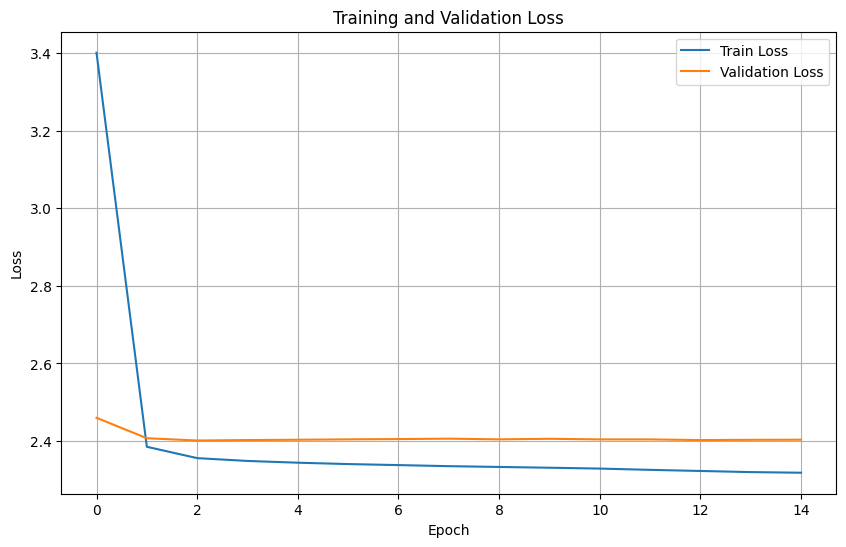

In [25]:
checkpoint = torch.load(model_path, map_location=device, weights_only=False)
### TODO ###

plt.figure(figsize=(10, 6))
plt.plot(checkpoint['train_losses'], label='Train Loss')
plt.plot(checkpoint['val_losses'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### END TODO ###

**Q-2.5.2 (2 points) Commentez les courbes obtenues. L'entraînement vous semble-t-il valide ? À quelle époque obtenez-vous le meilleur modèle ?**

In [26]:
# trouver la meilleur epoch
best_epoch = np.argmin(checkpoint['val_losses'])
print(f"meilleur model epoch est {best_epoch + 1} avec loss: {checkpoint['val_losses'][best_epoch]:.4f}")

meilleur model epoch est 3 avec loss: 2.4014


**Q-2.5.3 (1 point) Comment pourriez vous tenter d'obtenir de meilleurs résultats très simplement ?**

**Bravo, vous avez implémenté et entraîné votre propre modèle SGNS !**

Vous avez maintenant des embeddings de mots que vous pouvez utiliser pour diverses tâches NLP.

---
## 3. Comparaison des embeddings SGNS avec GloVe (20 points)

Une fois l'entraînement terminé et les embeddings sauvegardés, nous pouvons explorer les propriétés géométriques des vecteurs appris avec SGNS, et les comparer aux vecteurs GloVe. GLoVe est une autre technique utilisée pour obtenir des embeddings de mots. Nous n'allons pas la réimplémenter mais seulement récupérer les vecteurs obtenus après l'entraînement d'un modèle. Les embeddings, ainsi que des informations sur l'entraînement du modèle GloVe, sont disponibles à cette adresse: https://nlp.stanford.edu/projects/glove/. Ils sont déjà inclus dans les fichiers du TP, pas besoin de les télécharger à nouveau.

### 3.1 Chargement des vecteurs SGNS et GloVe (3 points)

In [27]:
args = SGNSArgs()

model_path = f"checkpoints/{args.model_name()}.pt"

# Charger les embeddings word et context
with open(f"embeddings/{args.model_name()}_word.pkl", "rb") as f:
    sgns_word_embeddings = pickle.load(f)

with open(f"embeddings/{args.model_name()}_context.pkl", "rb") as f:
    sgns_context_embeddings = pickle.load(f)

In [28]:
def load_glove_embeddings(path, vocab_limit=None, vocab_filter=None):
    embeddings = {}
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if vocab_limit is not None and i >= vocab_limit:
                break
            tokens = line.strip().split()
            word = tokens[0]
            # Filter by vocabulary if vocab_filter is provided
            if vocab_filter is not None and word not in vocab_filter:
                continue
            vector = np.array(tokens[1:], dtype=np.float32)
            embeddings[word] = vector
    print(f"{len(embeddings)} vecteurs GloVe chargés.")
    return embeddings

glove_path = "data/glove_data/glove.6B.50d.txt"
# Pass the keys of sgns_word_embeddings as the vocabulary filter
glove_embeddings = load_glove_embeddings(glove_path, vocab_filter=sgns_word_embeddings.keys())

29827 vecteurs GloVe chargés.


**Q-3.1 (3 points) En comparant le code de SGNS avec celui de GloVe, une différence est immédiatement visible entre les 2 types d'embeddings. Nommez la et expliquez-en la cause.**

### 3.2 Évaluation qualitative des embeddings (10 points)

#### 3.2.1 Similarité des embeddings (3 points)

**Q-3.2.1 (3 points) Explorez les relations sémantiques apprises par vos embeddings. Pour cela :**

1. Implémentez une fonction `cosine_similarity(vec1, vec2)` qui calcule la similarité cosinus entre deux vecteurs.
2. Implémentez une fonction `most_similar(word, embeddings, top_n=10)` qui retourne les `top_n` mots les plus similaires à un mot donné, selon cette similarité.

Si un mot n'est pas présent dans les embeddings, renvoyez une erreur.

In [29]:
### TODO ###


### END TODO ###

# Exemple d'utilisation (amusez-vous avec d'autres mots !)
target_word = "montreal"

print("======== SGNS ================")
top_words = most_similar(target_word, sgns_word_embeddings, top_n=5)
print(f"Mots les plus similaires à '{target_word}':")
for w, s in top_words:
    print(f"{w}: {s:.4f}")

print("======== GloVe ================")
top_words = most_similar(target_word, glove_embeddings, top_n=5)
print(f"Mots les plus similaires à '{target_word}':")
for w, s in top_words:
    print(f"{w}: {s:.4f}")

======== SGNS ================


NameError: name 'most_similar' is not defined

#### 3.2.2 Analogie (2 points)

**Q-3.2.2 (2 points) Implémentez une fonction `analogy` qui évalue des analogies du type "A est à B comme C est à ?".**

L'idée est d'utiliser l'arithmétique vectorielle dans l’espace des embeddings, selon la formule :

$$
\text{vec}(B) - \text{vec}(A) + \text{vec}(C)
$$

et de chercher les mots les plus proches du vecteur résultant.

Exemple d'analogie: **france - paris + madrid ≈ ?**

In [ ]:
### TODO ###


### END TODO ###

word1 = "paris"
word2 = "france"
word3 = "madrid"

print("======== SGNS ================")
print(f"\nAnalogie : {word2} - {word1} + {word3} ≈ ?")
analogie = analogy(word1, word2, word3, sgns_word_embeddings, top_n=5)
for w, s in analogie:
    print(f"{w}: {s:.4f}")

print("======== GloVe ================")
print(f"\nAnalogie : {word2} - {word1} + {word3} ≈ ?")
analogie = analogy(word1, word2, word3, glove_embeddings, top_n=5)
for w, s in analogie:
    print(f"{w}: {s:.4f}")

#### 3.2.3 Comparaison qualitative (1 point)

**Q-3.2.3 (1 point) Est ce que les exemples analysés indiquent que certains embeddings sont de meilleure qualité ?**

#### 3.2.4 Représentation visuelle (4 points)

**Q-3.2.4.1 (3 points) Représentez dans un plan 2D les vecteurs appris de plusieurs paires capitale / pays**.

L’objectif est d’observer si les relations entre pays et capitales sont **géométriquement cohérentes** dans l’espace vectoriel, c’est-à-dire :

* Est-ce que les embeddings associés à des capitales sont proches de ceux de leur pays ?
* Est-ce que les vecteurs formés par les paires capitale → pays sont similaires ?

Attention, il faut bien faire la différence entre les vecteurs de mots (les embeddings) et les vecteurs de relation entre 2 embeddings (capitale → pays). Les vecteurs de relation ne sont pas appris directement par le modèle, ils émergent naturellement de la structure sémantique apprise par le modèle. 

Pour cela, on utilise une méthode de réduction de dimension appelée **PCA** (Analyse en Composantes Principales). Cette méthode projette les vecteurs de grande dimension (dans notre cas 50) sur deux axes principaux (composantes), choisis de façon à conserver le plus possible de variance (structure) dans les données.

Concrètement :

```python
pca = PCA(n_components=2)
points_2d = pca.fit_transform(points)
```

retourne une liste de points 2D, où chaque point est un vecteur de la forme `(x, y)` que l’on peut décomposer comme suit :

```python
x, y = points_2d[i]
```

Ces points peuvent ensuite être affichés dans un graphe 2D, avec une couleur par paire capitale / pays et une flèche pour illustrer la relation entre les deux.
Les axes X et Y représentent les composantes principales extraites par PCA et n'ont pas de signification sémantique définie.

In [ ]:
def concept_representation(concepts: dict[str, str], word_embeddings: dict[str, np.ndarray], model_name: str):
  ### TODO ###
 
  ### END TODO ###

  plt.title(f"PCA - Réprésentation des concepts ({model_name})")
  plt.xlabel("Composante principale 1")
  plt.ylabel("Composante principale 2")
  plt.grid(True)
  plt.show()

In [ ]:
# Dictionnaire {capitale: pays}
europe_capitals = {
    "paris": "france",
    "berlin": "germany",
    "rome": "italy",
    "madrid": "spain",
}

concept_representation(europe_capitals, sgns_word_embeddings, "SGNS")

In [ ]:
concept_representation(europe_capitals, glove_embeddings, "GloVe")

**Q-3.2.4.2 (1 point) Observez et comparez la disposition des embeddings GloVe et SGNS. Quels embeddings semblent être de meilleure qualité ?**

### 3.3 Évaluation quantitative des embeddings avec Spearman sur SimLex-999 (7 points)

**Q-3.3.1 (1 point) Actuellement nous n'avons pas de jeu de test, quel risque cela pose-t-il pour l'évaluation de notre modèle ?**



Nous allons donc évaluer la qualité des vecteurs appris grâce à un jeu de données de test : le dataset SimLex-999.

Le dataset SimLex-999 contient 999 paires de mots (en anglais), chacune notée manuellement par des annotateurs humains selon leur similarité sémantique réelle (et non leur simple association).

* Exemple :

  * chat / tigre : similaires → score élevé
  * chat / litière : associés, mais pas similaires → score bas

SimLex-999 fait la distinction entre similarité (même catégorie/concept) et association (mots souvent co-occurrents).
C’est donc un bon test pour vérifier que les embeddings capturent des relations conceptuelles, et non seulement des co-occurrences statistiques.

Pour mesurer si les vecteurs SGNS reflètent cette similarité humaine, on compare :

* Le score humain de chaque paire du dataset (valeurs entre 0 et 10)
* Le cosinus entre les vecteurs de mots correspondants (valeurs entre 0 et 1)

On évalue la corrélation entre ces deux séries de scores à l’aide de la corrélation de Spearman.
Cette métrique mesure la similarité entre deux classements (ordres relatifs), indépendamment des valeurs exactes. Nous utilisons précisement cette métrique, parce qu'on veut savoir si "les paires les plus proches selon SGNS sont aussi les plus proches selon les humains", même si les échelles ne sont pas les mêmes.

Voici la formule de la corrélation de Spearman :

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

où $d_i$ est la différence de rangs entre les deux listes, et $n$ le nombre de paires.

**Q-3.3.2 (2 points) Implémentez la fonction d'évaluation utilisant SimLex-999.**

Cette fonction:
- lit les paires de mots et les scores de similarité à partir du fichier SimLex-999.txt

- calcule la similarité cosinus entre les embeddings de chaque paire (si les deux mots sont dans le dictionnaire)

- retourne la corrélation de Spearman entre les similarités calculées et les scores humains

Cette fonction nous permettra d'évaluer la qualité des embeddings SGNS durant l'entraînement.

In [ ]:
def simlex_eval(file_path="data/SimLex-999.txt", word_embeddings=None):
    ### TODO ###
    
    ### END TODO ###

    corr, _ = spearmanr(pairs, gold) # fonction de scipy.stats pour calculer la corrélation de Spearman
    return corr

**Q-3.3.3 (1 point) Évaluez les embeddings produits par votre modèle SGNS en les comparant à ceux du modèle pré-entraîné GloVe, à l’aide du dataset SimLex-999.**

In [ ]:
### TODO ###


### END TODO ###

**Q-3.3.4 (3 points) Est ce que les résultats obtenus confirment votre évaluation qualitative ? S'il y en a une, expliquez la différence de performance entre les 2 types d'embeddings.**

## Donné: Approximation des voisins les plus proches (0 point)

Les fonctions `most_similar` et `analogy` ne sont actuellement pas efficaces car elles nécessitent une recherche exhaustive (l'embedding cible est comparé avec tous les autres embeddings). Cela entraîne un coût computationnel de $O(V)$ (où $V$ est la taille du vocabulaire). Nous avons besoin de calculer de nombreuses similarités pour la prochaine section, il nous faut donc accélèrer ces fonctions.

Pour cela, nous utiliserons Annoy (Approximate Nearest Neighbors Oh Yeah). Annoy est une bibliothèque conçue pour trouver les voisins les plus proches dans un espace de haute dimension bien plus rapidement qu'une recherche exhaustive. Elle construit un index de voisins approximatifs (ANN) sous forme d'arbres de décisions aléatoires (similairement à un algorithme Random forest).

Lors d'une requête, Annoy navigue rapidement dans sa structure arborescente pour trouver des vecteurs probablement proches, sans vérifier chaque élément. Cela offre une accélération considérable, réduisant le temps de recherche à $O(log(V))$.

In [ ]:
!pip install annoy

In [ ]:
from annoy import AnnoyIndex

def build_annoy_index(embeddings, embedding_dim, num_trees=10):
    """
    Builds an Annoy index for word embeddings.

    Args:
        embeddings: Dictionary of word embeddings {word: vector}
        embedding_dim: Dimension of the embedding vectors
        num_trees: Number of trees to build (more trees = higher accuracy, slower build)

    Returns:
        Annoy index object and a list of words in the index order.
    """
    t = AnnoyIndex(embedding_dim, 'angular')  # Use angular for cosine distance (1 - cosine similarity)
    words_in_index = []
    for i, (word, vec) in enumerate(embeddings.items()):
        t.add_item(i, vec)
        words_in_index.append(word)

    print("Building Annoy index...")
    start_time = time.time()
    t.build(num_trees)
    end_time = time.time()
    print(f"Annoy index built in {end_time - start_time:.2f} seconds.")

    return t, words_in_index

In [ ]:
def most_similar_annoy(query_vec, annoy_index, words_in_index, embeddings_dict, top_n=10, exclude_words=[]):
    """
    Finds the most similar words using an Annoy index, given a query vector.

    Args:
        query_vec: The target vector.
        annoy_index: The built Annoy index object.
        words_in_index: List of words corresponding to the index item IDs.
        embeddings_dict: The original dictionary of embeddings (needed to get original vectors).
        top_n: Number of similar words to retrieve.
        exclude_words: List of words to exclude from the results.

    Returns:
        List of (word, similarity) tuples.
    """
    # Query the index for nearest neighbors
    # We ask for more than top_n to account for excluded words
    nearest_ids = annoy_index.get_nns_by_vector(query_vec, top_n + len(exclude_words) + 5, include_distances=True)

    similarities = []
    for item_id, distance in zip(nearest_ids[0], nearest_ids[1]):
        candidate_word = words_in_index[item_id]

        if candidate_word in exclude_words:
            continue # Skip excluded words

        # Calculate exact cosine similarity using original vectors
        candidate_vec = embeddings_dict[candidate_word]
        sim = cosine_similarity(query_vec, candidate_vec)
        similarities.append((candidate_word, sim))

        if len(similarities) >= top_n:
            break # Stop once we have enough results

    # Sort by similarity (descending) - Annoy's distances are ascending, need to re-sort by cosine
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]

def analogy_annoy(word_a, word_b, word_c, annoy_index, words_in_index, embeddings_dict, top_n=5):
    """
    Performs analogy task A is to B as C is to ? using vector arithmetic and Annoy for search.
    """
    for w in [word_a, word_b, word_c]:
        if w not in embeddings_dict:
            raise ValueError(f"Mot '{w}' non trouvé dans les embeddings.")

    # Calculate the target vector
    target_vec = embeddings_dict[word_b] - embeddings_dict[word_a] + embeddings_dict[word_c]

    # Use Annoy to find nearest neighbors to the target vector
    # Exclude the input words from the results
    exclude_words = [word_a, word_b, word_c]
    similarities = most_similar_annoy(target_vec, annoy_index, words_in_index, embeddings_dict, top_n, exclude_words)

    return similarities

In [ ]:
# Index build
sgns_annoy_index, sgns_words_in_index = build_annoy_index(sgns_word_embeddings, args.embedding_dim)
glove_annoy_index, glove_words_in_index = build_annoy_index(glove_embeddings, args.embedding_dim)

In [ ]:
target_word = "paris"

# Brute force timing
start_time = time.time()
most_similar(target_word, sgns_word_embeddings, top_n=5)
print(f"Brute force time: {time.time() - start_time:.4f} seconds")

# Annoy timing
start_time = time.time()
most_similar_annoy(sgns_word_embeddings[target_word], sgns_annoy_index, sgns_words_in_index, sgns_word_embeddings, top_n=5)
print(f"Annoy time: {time.time() - start_time:.4f} seconds")

---
## 4. Analyse des relations géométriques entre les embeddings (15 points)

Dans cette partie nous allons analyser en détail les relations entre les embeddings. En particulier, nous allons vérifier si les propriétés observées pour les relations capitales - pays sont généralisables à tous les types de relations.

La relation capitale - pays est une relation sémantique, mais il existe aussi des relations syntaxiques, par exemple singulier - pluriel (onion - onions). Il nous faut donc vérifier si les embeddings SGNS encodent bien ces relations de la même manière pour tous les jetons (avec des vecteurs similaires) ou bien si les régularités trouvées précédemment sont un hasard.

Pour cela, nous allons utiliser un jeu de données d'analogies sémantiques et syntaxiques séparées en plusieurs catégories (https://huggingface.co/datasets/tomasmcz/word2vec_analogy). La prochaine cellule charge ce jeu de données.

In [ ]:
# Define paths
analogies_path = "data/analogies/"

# Get all CSV files
semantic_files = glob.glob(os.path.join(analogies_path, "semantic", "*.csv"))
syntactic_files = glob.glob(os.path.join(analogies_path, "syntactic", "*.csv"))

print(f"Found {len(syntactic_files)} syntactic files:")
for f in syntactic_files:
    print(f"  {os.path.basename(f)}")

print(f"\nFound {len(semantic_files)} semantic files:")
for f in semantic_files:
    print(f"  {os.path.basename(f)}")

# Load and combine syntactic analogies
syntactic_data = []
for file in syntactic_files:
    df = pd.read_csv(file)
    df['category'] = os.path.basename(file).replace('.csv', '')
    syntactic_data.append(df)

syntactic_dataset = pd.concat(syntactic_data, ignore_index=True)

# Load and combine semantic analogies
semantic_data = []
for file in semantic_files:
    df = pd.read_csv(file)
    df['category'] = os.path.basename(file).replace('.csv', '')
    semantic_data.append(df)

semantic_dataset = pd.concat(semantic_data, ignore_index=True)

print(f"\nSyntactic dataset: {len(syntactic_dataset)} analogies")
print(f"Semantic dataset: {len(semantic_dataset)} analogies")

**Q-4.1 (3 points) Affichez les 5 premières analogies de chaque catégorie.**

In [ ]:
### TODO ###


### END TODO ###

**Q-4.2 (6 points) Créez une fonction utilisant le jeu de données et la fonction `analogy_annoy()` pour évaluer la qualité des relations au sein des embeddings.**

La fonction prend en paramètres les embeddings à évaluer, le jeu de données et une variable $k$. Si le mot du dataset est dans les $k$ premiers exemples retournées par la fonction `analogy_annoy()`, la prediction est considérée comme correcte.

Rappelez-vous d'appliquer les mêmes étapes de prétraitement que pour votre corpus d'entraînement. Si un des mots de l'analogie n'est pas présent dans les embeddings, vous devez passer l'exemple et le compter pour afficher le nombre d'exemple passés par catégories.

La sortie est attendue sous la forme:
 ```
category1     : accuracy (correct/total, skipped)
category2     : accuracy (correct/total, skipped)
category3     : accuracy (correct/total, skipped)
...

--------------------------------------------------
OVERALL       : accuracy (correct/total, skipped)
```

In [ ]:
def evaluate_analogy_dataset(annoy_index, words_in_index, embeddings, dataset_df, k=5):
    ### TODO ###

    ### END TODO ###

Vous pouvez tester votre fonction avec le code ci dessous. Une fois obtenue la sortie attendue, évaluez les embeddings SGNS et GloVE sur le dataset au complet (`sample_size = -1`)

In [ ]:
sample_size = 100 #@param {type:"integer"}

if sample_size != -1:
  syntactic_sample = syntactic_dataset.head(sample_size)
  semantic_sample = semantic_dataset.head(sample_size)
else:
  syntactic_sample = syntactic_dataset
  semantic_sample = semantic_dataset

print("\n" + "="*60)
print("SYNTACTIC ANALOGIES - SGNS EMBEDDINGS")
sgns_syntactic_results = evaluate_analogy_dataset(sgns_annoy_index, sgns_words_in_index, sgns_word_embeddings, syntactic_sample, k=5)

print("\n" + "="*60)
print("SYNTACTIC ANALOGIES - GLOVE EMBEDDINGS")
glove_syntactic_results = evaluate_analogy_dataset(glove_annoy_index, glove_words_in_index, glove_embeddings, syntactic_sample, k=5)

print("\n" + "="*60)
print("SEMANTIC ANALOGIES - SGNS EMBEDDINGS")
sgns_semantic_results = evaluate_analogy_dataset(sgns_annoy_index, sgns_words_in_index, sgns_word_embeddings, semantic_sample, k=5)

print("\n" + "="*60)
print("SEMANTIC ANALOGIES - GLOVE EMBEDDINGS")
glove_semantic_results = evaluate_analogy_dataset(glove_annoy_index, glove_words_in_index, glove_embeddings, semantic_sample, k=5)

**Q-4.3 (3 points) Analysez les résultats obtenus par SGNS. Quelles relations sont les mieux représentées par les embeddings au niveau syntaxique et sémantique?**

**Q-4.4 (1 point) Entre SGNS et GloVe, quels embeddings semblent être de meilleure qualité ?**

**Q-4.5 (2 points) Peut on conclure que nos résultats initiaux sur l'arithmétiques des vecteurs sont généralisables ? I.e., Est ce que les relations entre les mots peuvent être représentées par des vecteurs dans l'espace latent ?**


---
## 5. Analyse de la géométrie des embeddings SGNS (15 points)

Dans cette section, nous allons analyser finement **la structure géométrique** des vecteurs appris par SGNS. L'objectif est d'explorer comment ces vecteurs s'organisent dans l’espace latent, et quelles propriétés émergent lors de leur apprentissage. Ainsi nous pourrons potentiellemnt expliquer les différences de performance avec GloVe constatées dans les autres parties du TP.

### 5.1 Séparation en fréquence des embeddings (2 points)
**Q-5.1 (2 points) Regroupez les mots du vocabulaire en 4 catégories selon leur fréquence d’apparition.**

Pour cela, utilisez les rangs dans le vocabulaire trié par fréquence décroissante :

* `ultra_high` : mots de rang 0 à 99
* `high` : mots de rang 100 à 499
* `moderate` : mots de rang 500 à 4 999
* `low` : mots de rang 5 000 à 29 999

Affichez le nombre de mots dans chaque groupe pour vérifier la découpe.

Ensuite, **échantillonnez 100 mots** dans chaque groupe de façon aléatoire, et stockez-les dans un dictionnaire nommé `freq_groups` au format suivant :

```python
{
  'ultra_high': ['states', 's', 'one', ..., 'other'],             # 100 mots
  'high': ['present', 'william', 'science', ..., 'george'],       # 100 mots
  'moderate': ['jay', 'massive', 'solutions', ..., 'particles'],  # 100 mots
  'low': ['bounded', 'gaines', 'metabolism', ..., 'lundy'],       # 100 mots
}
```

Cela vous permettra ensuite de comparer les propriétés géométriques des vecteurs en fonction de leur fréquence.


In [ ]:
random.seed(42) # pour la reproductibilité des résultats. Utilisez random.sample(...).

### TODO ###

### END TODO ###

### 5.2 Alignement global des vecteurs de mots (13 points)

Dans cette analyse, vous allez étudier l’orientation globale des vecteurs appris par SGNS.

L’objectif est de déterminer si les vecteurs pointent dans des directions similaires, c’est-à-dire s’ils sont alignés avec un **axe dominant**. Pour cela, on analyse les **produits scalaires** entre chaque vecteur et un **vecteur moyen** $\bar{v}$.

**Q-5.2.1 (2 points) Pourquoi trace-t-on le produit scalaire avec le vecteur moyen ?**

**Q-5.2.2 (4 points) Implémentez la fonction `plot_mean_product_density`.**

Cette fonction trace la **densité des produits scalaires** entre les vecteurs de mots et un vecteur moyen $\bar{v}$, pour chaque groupe de fréquence. La densité permet de visualiser la distribution des produits scalaires avec une courbe, plutôt que d'utiliser un histogramme par exemple. Vous pouvez obtenir la densité en utilisant la fonction `gaussian_kde` de `scipy.stats`.

Elle prend en entrée :

* `embeddings` : un dictionnaire {mot → vecteur}
* `freq_groups` : le dictionnaire contenant les 100 mots de chaque groupe de fréquence
* `title` : le titre du graphique
* `normalize` : booléen, si `True` alors tous les vecteurs sont normalisés avant calcul
* `mean_vector` : optionnel. Si un vecteur moyen est fourni, il sera utilisé tel quel. Sinon, il est calculé automatiquement à partir de tous les vecteurs de l’échantillon.

In [ ]:
def plot_mean_product_density(embeddings, freq_groups, title="Mean product to average vector", normalize=True, mean_vector = np.array([])):
    """
    Affiche une densité (KDE) des produits scalaires entre chaque vecteur et le vecteur moyen.
    """
    ### TODO ###


    ### for each freq group:###
    #for group_name, word_list in freq_groups.items():

    ### END TODO ###
    x_range = np.linspace(dot_products.min() - 0.5, dot_products.max() + 0.5, 200)
    plt.plot(x_range, gaussian_density(x_range), label=group_name)

    if max(gaussian_density(x_range)) > y_max :
          y_max = max(gaussian_density(x_range))

    plt.vlines(x = 0, ymin=0, ymax=y_max, colors= "black")
    plt.title(title)
    plt.xlabel("Produit scalaire avec le vecteur moyen")
    plt.ylabel("Densité")
    plt.grid(True)
    plt.legend()
    plt.show()

Nous allons maintenant appeler la fonction sur les embeddings SGNS et GloVe.

In [ ]:
plot_mean_product_density(sgns_word_embeddings, freq_groups, title="SGNS word vectors: Cosine to mean", normalize=True)

In [ ]:
plot_mean_product_density(glove_embeddings, freq_groups, title="GloVe vectors: Cosine to mean", normalize=True)

**Q-5.2.3 (4 points) Que peut-on déduire des résultats obtenus, en particulier sur la géométrie de l’espace latent our SGNS et GloVe?**


**Q-5.2.4 (3 points) À quoi peut on s'attendre si on retire le vecteur moyen à tous les vecteurs de mot, pour SGNS et pour GloVe ?**

---
## Conclusion (0 point)

À travers ces expériences, nous avons entraîné un modèle SGNS pour apprendre des embeddings de mots à partir d'un corpus de texte.

Nous avons comparé ces embeddings à ceux de GloVe, en analysant leurs propriétés géométriques et sémantiques.

Enfin, nous avons analysé plus en détails les relations sémantiques et syntaxiques capturées par les embeddings SGNS.

## Livrables
Vous devez remettre votre notebook sur Moodle en ipynb et pdf sous forme de inf8460_TP1_grX_equipeY.zip (renommez X et Y selon votre groupe de laboratoire et votre numéro d'équipe) et sur Gradescope en pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope. Assurez-vous que votre PDF représente bien votre notebook sans problème de formatage. Un notebook mal généré en PDF ne sera pas évalué.


## Évaluation 
Votre TP sera évalué selon les critères suivants :
1. Exécution correcte du code et obtention des sorties attendues
2. Réponses correctes aux questions d'analyse
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs